In [25]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# update import path
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..', 'src'))

import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from importlib import reload
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib

# no warnings on dataframe slices
pd.options.mode.chained_assignment = None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
# read csv
data = pd.read_csv(os.path.join('..', 'data', 'history_20180916_2059.csv'), index_col=0)

# make datetime index (could also be done directly in read_csv)
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.set_index('datetime')

print (data.shape)
data.head()

(7171, 9)


,angle_of_attack,boat_angle,boat_heel,boat_speed,course_error,rudder_angle,target_angle,wind_direction,wind_speed
datetime,,,,,,,,,
2018-09-16 20:53:48.375632,42.846070,0.222721,11.136044,3.379326,-179.468765,0.0,179.691486,43.068791,16.307566
2018-09-16 20:53:48.435008,41.776074,0.428900,10.308938,3.199666,-179.262587,-1.0,179.691486,42.204973,15.411768
2018-09-16 20:53:48.477066,41.676696,0.701732,10.441951,3.227596,-178.989754,-2.0,179.691486,42.378428,15.639983
2018-09-16 20:53:48.517674,40.784394,1.033681,10.142279,3.161023,-178.657805,-3.0,179.691486,41.818076,15.463363
2018-09-16 20:53:48.561308,41.326493,1.432001,10.432917,3.224497,-178.259485,-4.0,179.691486,42.758494,15.734038


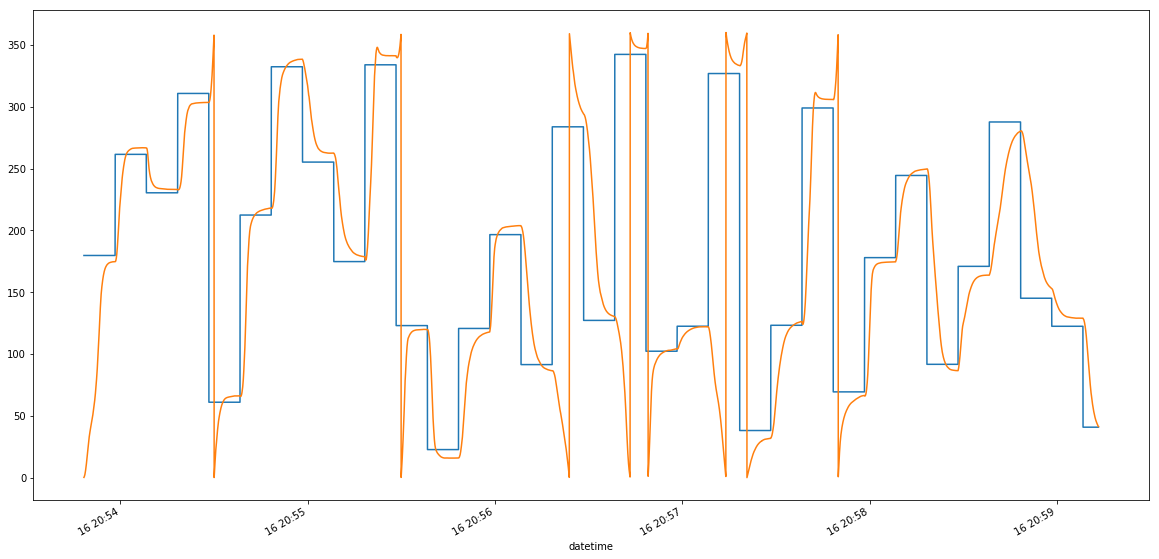

In [69]:
# show the boat approaching the target course
_, ax = plt.subplots(figsize=(20, 10))
data['target_angle'].plot(ax=ax)
data['boat_angle'].plot(ax=ax)

In [61]:
# select features and target
y = data['rudder_angle']
x = data[['angle_of_attack', 'boat_heel', 'boat_speed', 'course_error', 'wind_speed']]

# split test/train sets
split = int(0.8 * data.shape[0])
train_x, test_x = x[:split], x[split:]
train_y, test_y = y[:split], y[split:]

# train model
model = GradientBoostingRegressor(n_estimators=100)
model.fit(train_x, train_y)

# show performance
pred_y = model.predict(test_x)
print (mean_absolute_error(pred_y, test_y))

1.950342565788187


In [50]:
# save model
joblib.dump(model, os.path.join('..', 'data', 'model.pkl'))

['../data/model.pkl']